<div align="center"><h1>Simulated annealing</h1></div>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif" align="center">

<div align="right">Bruno L. Carli,<br />2021</div>

In [1]:
from math import exp
from random import random, choice, randint, uniform
import matplotlib.pyplot as plt

In [5]:
# Generate random numbers
vector = [random() for _ in range(30)]

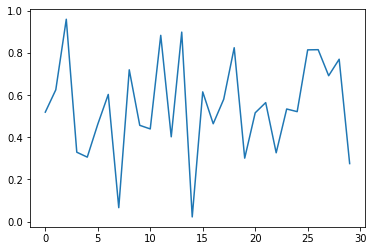

In [6]:
# Plots the generateed data
plt.plot(vector)

In [7]:
class Node:
    """
    Simple node representation.
    """
    def __init__(self, is_root=False, state=None, value=None):
        self.is_root = is_root
        self.state = state
        self.value = value


In [8]:
def simulated_annealing(vector, scaling, target='max', initial_temperature=None):
    """
    Returns global maximum Node if param target is "max";
    Returns global minimum Node if param target is "min";
    Scaling is the "step size" or, "learning_rate", which decreases the temperature
    over the search iterations.
    If no initial temperature is inputed, then it will randomly start with a integer
    between 1 and 90.

    Returns a Node object.
    """
    if target != 'max' and target != 'min':
        raise Exception('Targets must be "max" or "min".')

    if not initial_temperature:
        initial_temperature = randint(1, 90)

    state = vector.index(choice(vector))
    current_node = Node(is_root=True, state=state, value=vector[state])

    current_temperature = initial_temperature
    error_threshold = 0
    while current_temperature > 0:
        if current_temperature <= 0:
            return current_node

        next_state = vector.index(choice(vector))
        next_node = Node(state=next_state, value=vector[next_state])
        delta_error = next_node.value - current_node.value

        if target == 'max':
            if delta_error > 0:
                current_node = next_node

            elif uniform(0, 1) < exp(delta_error/current_temperature):
                current_node = next_node

        else:
            if delta_error < 0:
                current_node = next_node

            elif uniform(0, 1) > exp(delta_error/current_temperature):
                current_node = next_node

        current_temperature -= scaling

    return current_node

In [14]:
# gets the global maximum and minimum
global_max = simulated_annealing(vector, .01, initial_temperature=1000)
global_min = simulated_annealing(vector, .1, initial_temperature=1000, target='min')
print(f'Global max {global_max.value} found at position {global_max.state}')
print(f'Global min {global_min.value} found at position {global_min.state}')

Global max 0.959432700875807 found at position 2
Global min 0.022202781828173923 found at position 14


In [15]:
# Proves the max and min with python builtin
print(f'Max {max(vector)} - position {vector.index(max(vector))}')
print(f'Min {min(vector)} - position {vector.index(min(vector))}')

Max 0.959432700875807 - position 2
Min 0.022202781828173923 - position 14
